<a href="https://colab.research.google.com/github/meherjyothi/arty/blob/master/LOAN_VIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/train_loan1.csv') 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORATORY ANALYSIS

In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
data['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [ ]:
data['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [ ]:
data['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


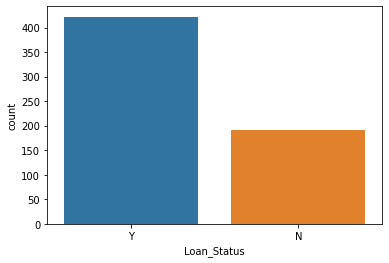

In [ ]:
sns.countplot(data['Loan_Status'])

In [ ]:
corr=data.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


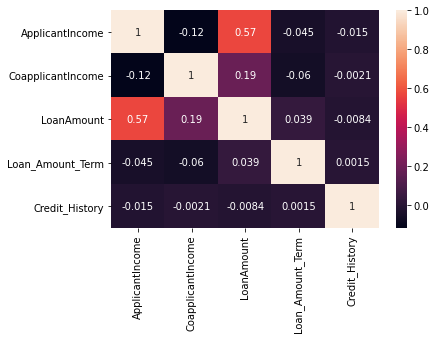

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
corr['LoanAmount'][abs(corr['LoanAmount'])>0.1]

ApplicantIncome      0.570909
CoapplicantIncome    0.188619
LoanAmount           1.000000
Name: LoanAmount, dtype: float64

In [ ]:
corr['Loan_Amount_Term'][abs(corr['Loan_Amount_Term'])>0.1]

Loan_Amount_Term    1.0
Name: Loan_Amount_Term, dtype: float64

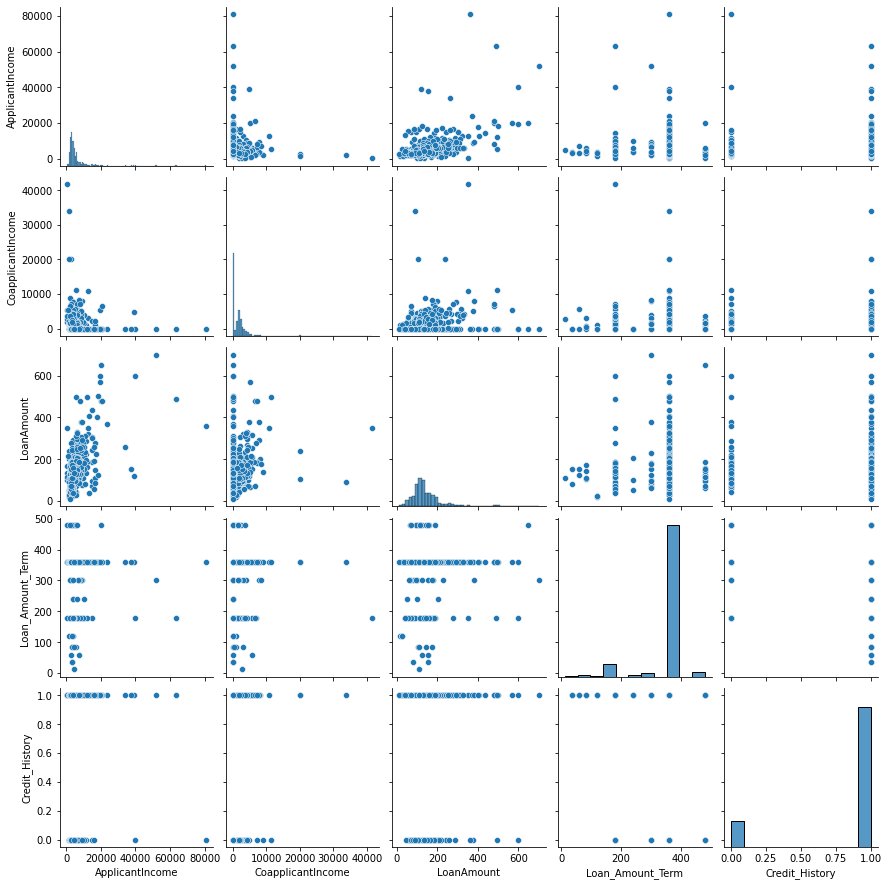

In [ ]:
sns.pairplot(data)


In [ ]:
#SCATTERPLOT

# DATA PRE-PROCESSING




In [ ]:
#DROPPING LOAD ID

data.drop(['Loan_ID'], inplace=True, axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# LABEL ENCODING / OR ONE HOT ENCODING / MANUALLY REPLACING VALUES

#GENDER
data.loc[data.Gender=='Male', 'Gender'] = 0
data.loc[data.Gender=='Female', 'Gender'] = 1 

#MARRIED
data.loc[data.Married=='No', 'Married'] = 0
data.loc[data.Married=='Yes', 'Married'] = 1

#EDUCATION
data.loc[data.Education=='Not Graduate', 'Education'] = 0
data.loc[data.Education=='Graduate', 'Education'] = 1

#SELF EMPLOYED
data.loc[data.Self_Employed=='No', 'Self_Employed'] = 0
data.loc[data.Self_Employed=='Yes', 'Self_Employed'] = 1

#PROPERTY AREA
data.loc[data.Property_Area=='Urban', 'Property_Area'] = 1
data.loc[data.Property_Area=='Semiurban', 'Property_Area'] = 0.5
data.loc[data.Property_Area=='Rural', 'Property_Area'] = 0

#LOAN STATUS
data.loc[data.Loan_Status=='N', 'Loan_Status'] = 0
data.loc[data.Loan_Status=='Y', 'Loan_Status'] = 1

#DEPENDENTS
data.loc[data.Dependents=='0', 'Dependents'] = 0
data.loc[data.Dependents=='1', 'Dependents'] = 1
data.loc[data.Dependents=='2', 'Dependents'] = 2
data.loc[data.Dependents=='3+', 'Dependents'] = 3
data.loc[data.Dependents=='3', 'Dependents'] = 3

### DEALING WITH NULL VALUES

> 



In [ ]:
#CREDIT HISTORY NULL VALUES

data.loc[ (pd.isnull(data['Credit_History'])) & (data['Loan_Status'] == 1), 'Credit_History'] = 1
data.loc[ (pd.isnull(data['Credit_History'])) & (data['Loan_Status'] == 0), 'Credit_History'] = 0

In [ ]:
#LOAN AMOUNT TERM NULL VALUES

data['Loan_Amount_Term'].fillna(int(data['Loan_Amount_Term'].mode()), inplace=True)

In [ ]:
pd.DataFrame(data.groupby(['Dependents','Education','Self_Employed'])['Married'].value_counts())

Married
Dependents Education Self_Employed Married         
0          0         0             0             30
                                   1             28
                     1             0              4
                                   1              4
           1         0             1            120
                                   0            111
                     1             0             17
                                   1             12
1          0         0             1             14
                                   0              3
                     1             0              3
           1         0             1             48
                                   0             11
                     1             1             14
                                   0              3
2          0         0             1             21
                     1             1              2
           1         0             1             52
                                   0              7
                     1             1             14
3          0         0             1             10
                                   0              2
                     1             1              3
           1         0             1             27
                                   0              3
                     1             1              3
                                   0              1

In [ ]:
# MARRIED NULL VALUES

data.loc[ (pd.isnull(data['Married'])) & ((data['Dependents'] == '3') | (data['Dependents']=='2')) & (data['Education']==1) & (data['Self_Employed'] == 0), 'Married'] = 1
data.loc [pd.isnull(data['Married']) , 'Married'] = 0

In [ ]:
pd.DataFrame(data.groupby(['Dependents','Education','Self_Employed'])['Gender'].value_counts())

Gender
Dependents Education Self_Employed Gender        
0          0         0             0           46
                                   1           12
                     1             0            5
                                   1            3
           1         0             0          171
                                   1           55
                     1             0           20
                                   1            7
1          0         0             0           16
                                   1            1
                     1             0            2
                                   1            1
           1         0             0           48
                                   1           11
                     1             0           12
                                   1            4
2          0         0             0           20
                     1             0            2
           1         0             0           53
                                   1            5
                     1             0           14
3          0         0             0           11
                                   1            1
                     1             0            3
           1         0             0           27
                                   1            1
                     1             0            3

In [ ]:
#GENDER NULL VALUES

data.loc[ (pd.isnull(data['Gender'])) &  (data['Self_Employed'] == 0), 'Gender'] = 0
data.loc[ (pd.isnull(data['Gender'])) , 'Gender'] = 1

In [ ]:
pd.DataFrame(data.groupby(['Gender','Education','Self_Employed'])['Dependents'].value_counts())

Dependents
Gender Education Self_Employed Dependents            
0      0         0             0                   46
                               2                   21
                               1                   16
                               3                   11
                 1             0                    5
                               3                    3
                               1                    2
                               2                    2
       1         0             0                  176
                               2                   54
                               1                   48
                               3                   29
                 1             0                   20
                               2                   14
                               1                   12
                               3                    3
1      0         0             0                   12
                               1                    1
                               3                    1
                 1             0                    3
                               1                    1
       1         0             0                   55
                               1                   11
                               2                    5
                               3                    1
                 1             0                    9
                               1                    5
                               3                    1

In [ ]:
pd.DataFrame(data.groupby(['Gender','Education','Dependents'])['Self_Employed'].value_counts())

Self_Employed
Gender Education Dependents Self_Employed               
0      0         0          0                         46
                            1                          5
                 1          0                         16
                            1                          2
                 2          0                         21
                            1                          2
                 3          0                         11
                            1                          3
       1         0          0                        176
                            1                         20
                 1          0                         48
                            1                         12
                 2          0                         54
                            1                         14
                 3          0                         29
                            1                          3
1      0         0          0                         12
                            1                          3
                 1          0                          1
                            1                          1
                 3          0                          1
       1         0          0                         55
                            1                          9
                 1          0                         11
                            1                          5
                 2          0                          5
                 3          0                          1
                            1                          1

In [ ]:
data.loc[data['Self_Employed'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,0,1,2,1,NaN,2500,1840.0,109.0,360.0,1.0,1,1
19,0,1,0,1,NaN,2600,3500.0,115.0,360.0,1.0,1,1
24,0,1,1,1,NaN,3717,2925.0,151.0,360.0,0.0,0.5,0
29,1,0,2,1,NaN,3750,2083.0,120.0,360.0,1.0,0.5,1
30,0,1,1,1,NaN,4166,3369.0,201.0,360.0,0.0,1,0
95,0,0,0,1,NaN,6782,0.0,NaN,360.0,0.0,1,0
107,0,0,0,0,NaN,7333,0.0,120.0,360.0,1.0,0,0
111,1,1,0,1,NaN,2929,2333.0,139.0,360.0,1.0,0.5,1
114,0,0,0,1,NaN,5050,0.0,118.0,360.0,1.0,0.5,1
158,0,0,0,1,NaN,2980,2083.0,120.0,360.0,1.0,0,1


In [ ]:
#SELF EMPLOYED NULL VALUES 

data.loc[ (pd.isnull(data['Self_Employed'])) &  (data['Dependents'] == 0) & (data['Education'] == 1) , 'Self_Employed'] = 0
data.loc[ (pd.isnull(data['Self_Employed'])) &  (data['Gender'] == 0) & (data['Education'] == 1) , 'Self_Employed'] = 0
data.loc[ (pd.isnull(data['Self_Employed'])) &  (data['Gender'] == 0) & (data['Education'] == 1) & (data['Dependents']==0), 'Self_Employed'] = 0
data.loc[ (pd.isnull(data['Self_Employed']))  , 'Self_Employed'] = 1


In [ ]:
pd.DataFrame(data.groupby(['Loan_Amount_Term'])['LoanAmount'].value_counts())

LoanAmount
Loan_Amount_Term LoanAmount            
12.0             111.0                1
36.0             80.0                 1
                 155.0                1
60.0             125.0                1
                 155.0                1
...                                 ...
480.0            143.0                1
                 151.0                1
                 158.0                1
                 187.0                1
                 650.0                1

[263 rows x 1 columns]

In [ ]:
# LOAN AMOUNT NULL VALUES

data['LoanAmount'].fillna(int(data['LoanAmount'].mean()), inplace=True)

In [ ]:
pd.DataFrame(data.groupby(['Self_Employed','ApplicantIncome'])['Dependents'].value_counts())

Dependents
Self_Employed ApplicantIncome Dependents            
0             150             0                    1
              645             0                    1
              1025            0                    2
              1299            2                    1
              1378            2                    1
...                                              ...
1             17500           2                    1
              18165           0                    1
              19484           1                    1
              20166           0                    1
              39147           0                    1

[551 rows x 1 columns]

In [ ]:


data.loc[ (pd.isnull(data['Dependents'])) &  (data['Self_Employed'] == 0) & (data['Education'] == 1) , 'Self_Employed'] = 0
data['Dependents'].fillna(int(data['Dependents'].mode()), inplace=True)

In [ ]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.0,360.0,1.0,1,1
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


SCALING/NORMALISING NUMERIC DATA


In [ ]:
from sklearn.preprocessing import MinMaxScaler

data['ApplicantIncome'] = MinMaxScaler().fit_transform(np.array(data['ApplicantIncome']).reshape(-1,1))
data['CoapplicantIncome'] = MinMaxScaler().fit_transform(np.array(data['CoapplicantIncome']).reshape(-1,1))
data['LoanAmount'] = MinMaxScaler().fit_transform(np.array(data['LoanAmount']).reshape(-1,1))
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,0.070489,0.000000,0.198263,360.0,1.0,1,1
1,0,1,1,1,0,0.054830,0.036192,0.172214,360.0,1.0,0,0
2,0,1,0,1,1,0.035250,0.000000,0.082489,360.0,1.0,1,1
3,0,1,0,0,0,0.030093,0.056592,0.160637,360.0,1.0,1,1
4,0,0,0,1,0,0.072356,0.000000,0.191027,360.0,1.0,1,1


In [ ]:
data['Gender'] = data["Gender"].astype(str).astype(int)
data['Married'] = data["Married"].astype(str).astype(int)
data['Education'] = data["Education"].astype(str).astype(int)
data['Self_Employed'] = data["Self_Employed"].astype(str).astype(int)
data['Property_Area'] = data["Property_Area"].astype(str).astype(float)
data['Loan_Status'] = data["Loan_Status"].astype(str).astype(int)

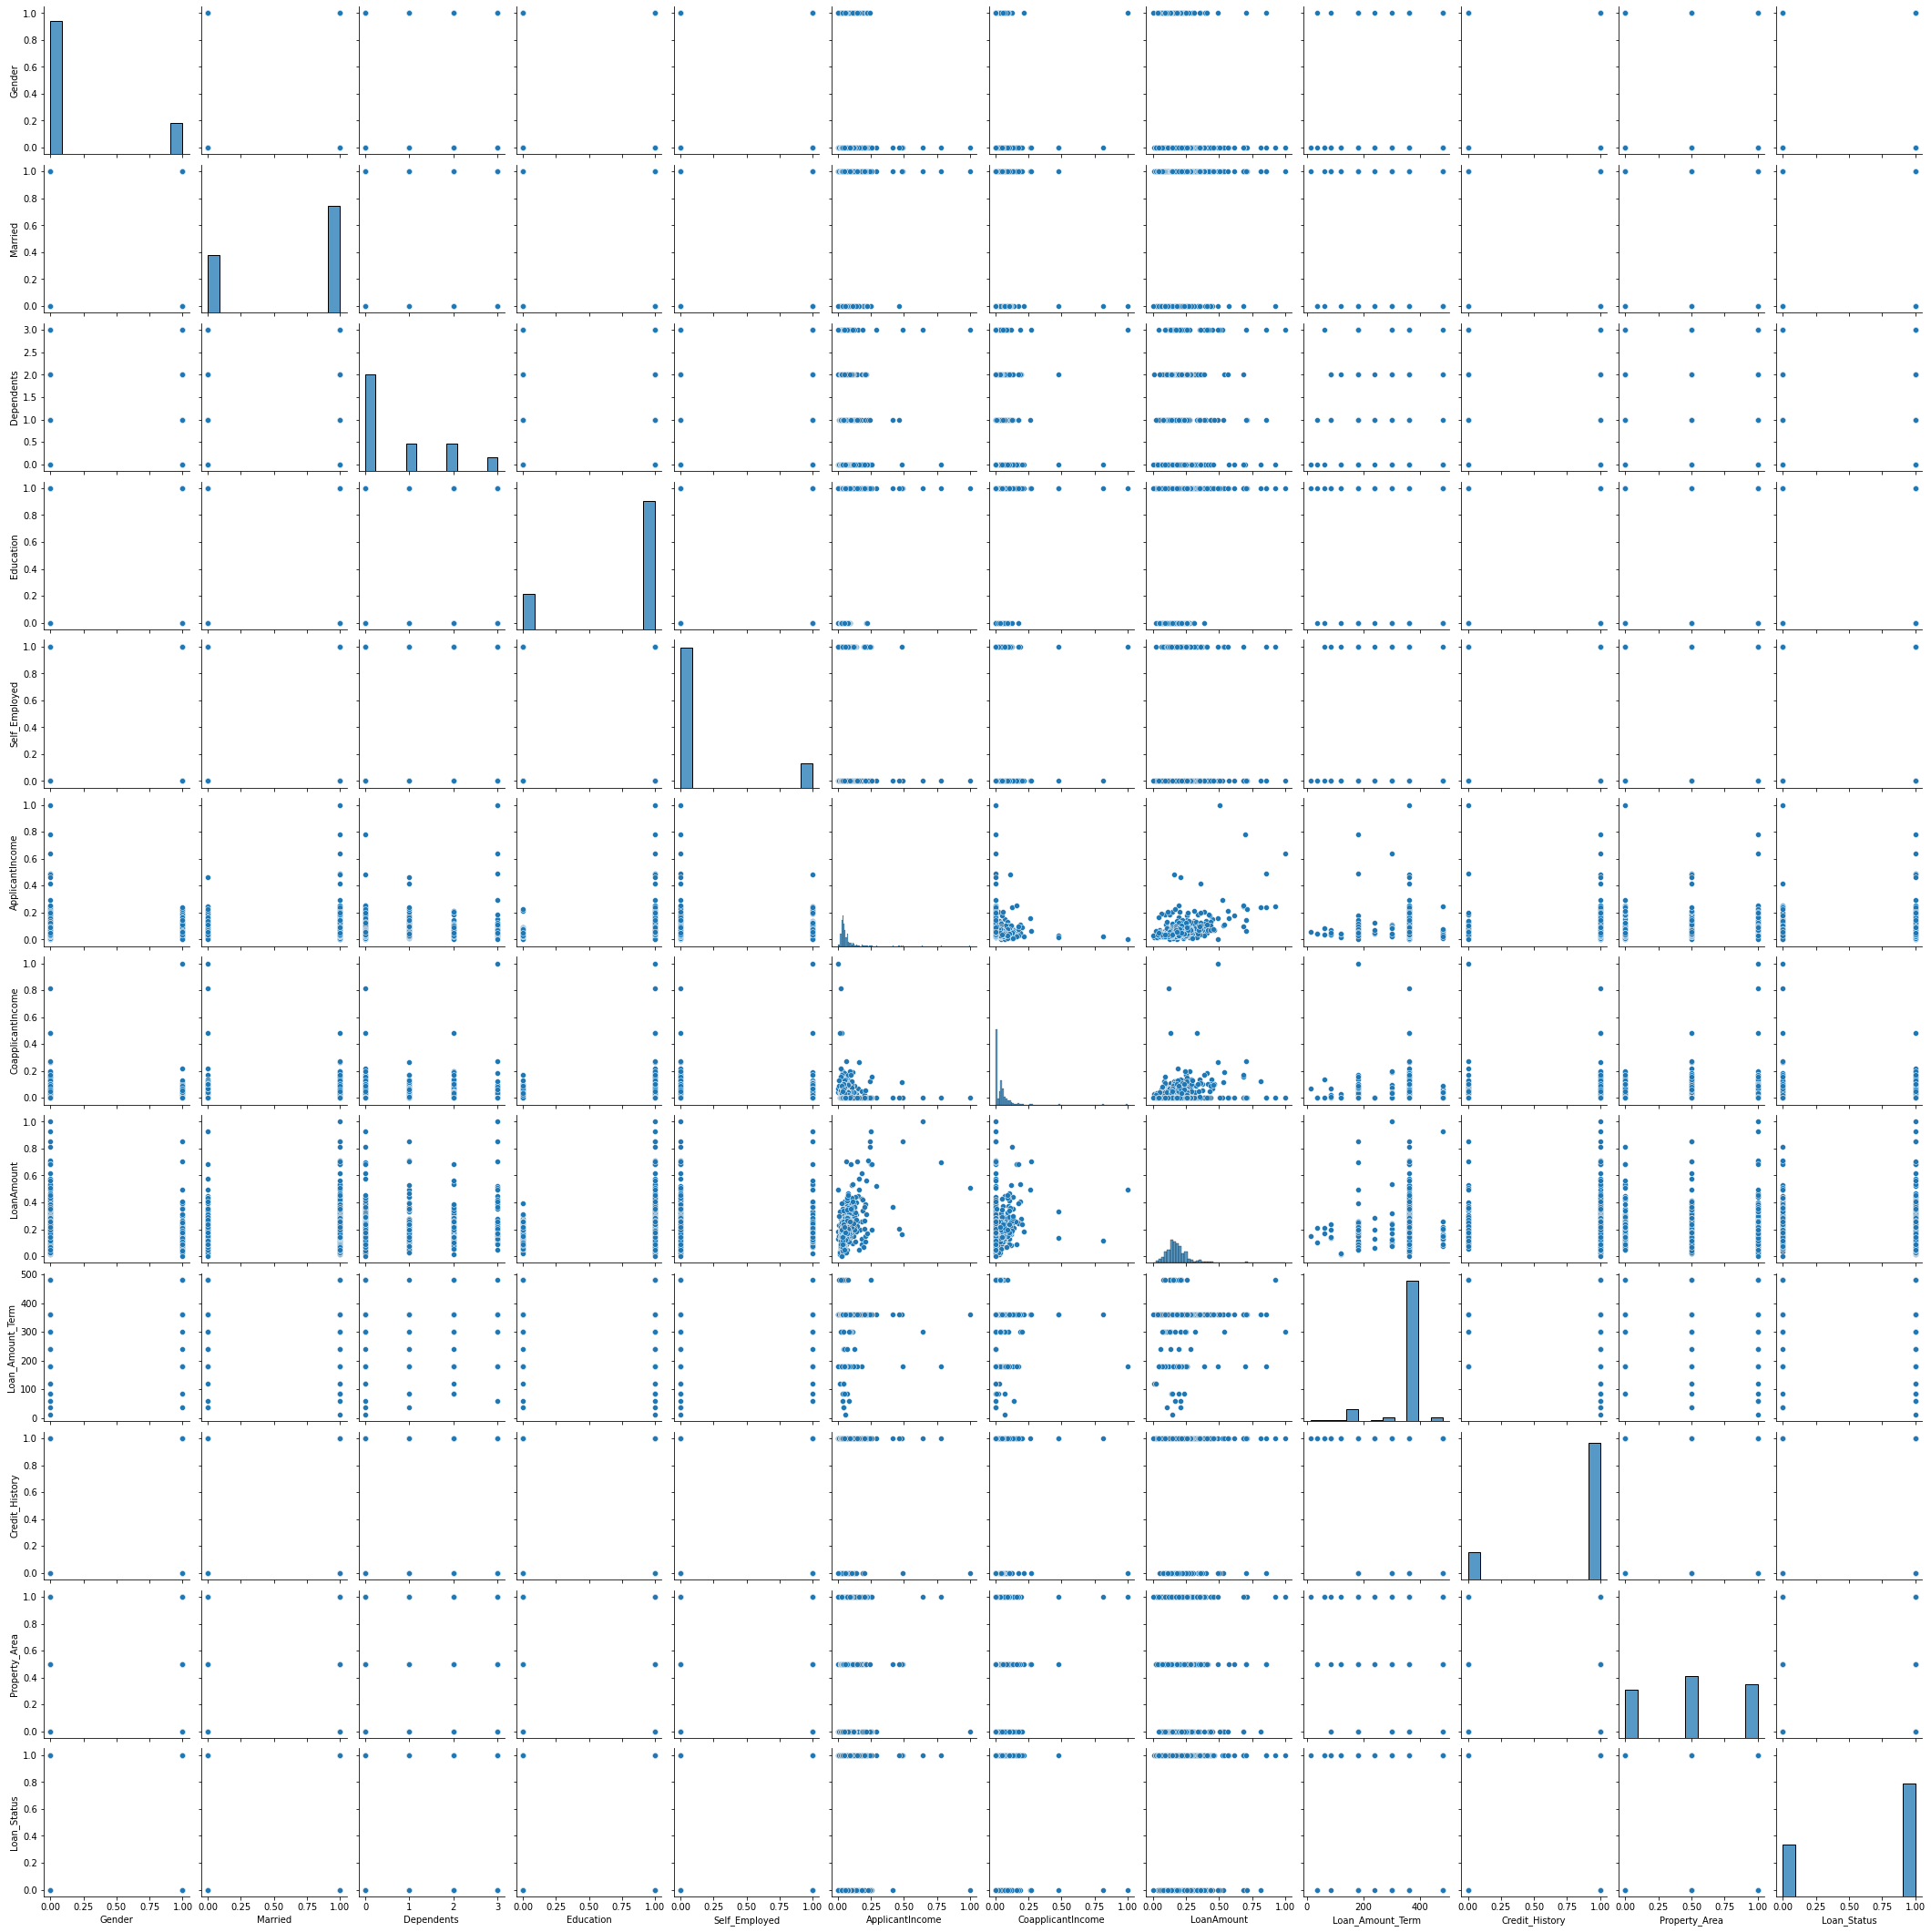

In [ ]:
sns.pairplot(data)


In [ ]:
corr=data.corr()
corr


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.358898,-0.166369,0.053547,0.079719,-0.057791,-0.075070,-0.095734,0.065947,0.014201,0.024613,-0.006519
Married,-0.358898,1.000000,0.340684,-0.017671,-0.019073,0.050194,0.080496,0.145647,-0.103381,0.010238,0.000395,0.084281
Dependents,-0.166369,0.340684,1.000000,-0.055752,0.064835,0.118202,0.030430,0.163108,-0.103864,-0.048068,-0.000244,0.010118
Education,0.053547,-0.017671,-0.055752,1.000000,-0.034847,0.140760,0.062290,0.167041,0.073928,0.071397,0.065243,0.085884
Self_Employed,0.079719,-0.019073,0.064835,-0.034847,1.000000,0.106130,0.045224,0.108897,-0.033847,0.013760,-0.048986,0.004509
ApplicantIncome,-0.057791,0.050194,0.118202,0.140760,0.106130,1.000000,-0.116605,0.565621,-0.046531,-0.010051,-0.009500,-0.004710
CoapplicantIncome,-0.075070,0.080496,0.030430,0.062290,0.045224,-0.116605,1.000000,0.187863,-0.059383,-0.054737,0.010522,-0.059187
LoanAmount,-0.095734,0.145647,0.163108,0.167041,0.108897,0.565621,0.187863,1.000000,0.036486,-0.023579,-0.044818,-0.036345
Loan_Amount_Term,0.065947,-0.103381,-0.103864,0.073928,-0.033847,-0.046531,-0.059383,0.036486,1.000000,-0.007758,-0.076120,-0.022549
Credit_History,0.014201,0.010238,-0.048068,0.071397,0.013760,-0.010051,-0.054737,-0.023579,-0.007758,1.000000,0.004565,0.595642


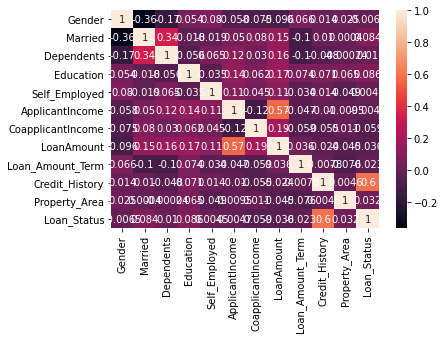

In [ ]:
sns.heatmap(corr, annot=True )


In [ ]:
!pip install tpot 


     |████████████████████████████████| 92kB 4.3MB/s 
     |████████████████████████████████| 163kB 9.7MB/s 
     |████████████████████████████████| 166.7MB 83kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=bb3330a9465ec1c68404059ae46e06c91c55aae715eb6f8c38faed817cb8636a
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
#from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from tpot import TPOTClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pd.to_numeric(data['Gender'])
pd.to_numeric(data['Married'])
pd.to_numeric(data['Education'])
pd.to_numeric(data['Self_Employed'])
pd.to_numeric(data['Property_Area'])

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    0.0
610    0.0
611    1.0
612    1.0
613    0.5
Name: Property_Area, Length: 614, dtype: float64

In [ ]:
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']
y=y.astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


In [ ]:
type(y)
type(X)


pandas.core.frame.DataFrame

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)


In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('lr',LogisticRegression())])
pipeline_dt=Pipeline([('scaler2',StandardScaler()),
                     ('dt',DecisionTreeClassifier())])
pipeline_rf=Pipeline([('scalar3',StandardScaler()),
                     ('rfc',RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('knn',KNN())])
pipeline_xgbc=Pipeline([('scalar5',StandardScaler()),
                     ('xgboost',XGBClassifier())])
pipeline_lgbc=Pipeline([('scalar6',StandardScaler()),
                     ('lgbc',lgb.LGBMClassifier())])
pipeline_ada=Pipeline([('scalar7',StandardScaler()),
                     ('adaboost',AdaBoostClassifier())])
pipeline_sgdc=Pipeline([('scalar8',StandardScaler()),
                     ('sgradient',SGDClassifier())])
pipeline_nb=Pipeline([('scalar9',StandardScaler()),
                     ('nb',GaussianNB())])
pipeline_extratree=Pipeline([('scalar10',StandardScaler()),
                     ('extratree',ExtraTreesClassifier())])
pipeline_svc=Pipeline([('scalar11',StandardScaler()),
                     ('svc',SVC())])
pipeline_gbc=Pipeline([('scalar12',StandardScaler()),
                     ('GBC',GradientBoostingClassifier())])

In [ ]:
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgbc,pipeline_lgbc,pipeline_ada,pipeline_sgdc,pipeline_nb,pipeline_extratree,pipeline_svc,pipeline_gbc]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
pipe_dict={0:'Logistic Regression',1:'Random Forest',2:'Decision Tree',3:'KNN',4:'XGBC',5:'LGBC',6:'ADA',7:'SGDC',8:'NB',9:'ExtraTree',10:'SVC',11:'GBC'}

###  DEALING WITH THE BIAS - SMOTING

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('auto')


In [ ]:
X_sm, y_sm = smote.fit_sample(X_train,y_train)
print(X_sm.shape, y_sm.shape)

(664, 11) (664,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Beofre smoting : ',y.shape)
print('Beofre smoting : ',y_sm.shape)


Beofre smoting :  (614,)
Beofre smoting :  (664,)


In [ ]:
for i in pipelines:
    i.fit(X_sm,y_sm)
    predictions=i.predict(X_test)
    print('Classification Report : \n',i,(classification_report(y_test,predictions)))



Classification Report : 
 Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)               precision    recall  f1-score   support

           0       0.78      0.55      0.64        33
           1       0.85      0.94      0.89        90

    accuracy                           0.84       123
   macro avg       0.82      0.74      0.77       123
weighted avg       0.83      0.84      0.83

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report : 
 Pipeline(memory=None,
         steps=[('scalar5',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=2, num_parallel_tree=1,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_meth

In [ ]:
pipelines[0]

Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
for i,model in enumerate(pipelines): print('{} Train Accuracy {}'.format(pipe_dict[i],model.score(X_sm,y_sm)))

Logistic Regression Train Accuracy 0.7515060240963856
Random Forest Train Accuracy 1.0
Decision Tree Train Accuracy 1.0
KNN Train Accuracy 0.8704819277108434
XGBC Train Accuracy 1.0
LGBC Train Accuracy 1.0
ADA Train Accuracy 0.8539156626506024
SGDC Train Accuracy 0.7078313253012049
NB Train Accuracy 0.7439759036144579
ExtraTree Train Accuracy 1.0
SVC Train Accuracy 0.7966867469879518
GBC Train Accuracy 0.9126506024096386


In [ ]:
for i,model in enumerate(pipelines): print('{} Test Accuracy {}'.format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy 0.8373983739837398
Random Forest Test Accuracy 0.6910569105691057
Decision Tree Test Accuracy 0.7886178861788617
KNN Test Accuracy 0.7398373983739838
XGBC Test Accuracy 0.7642276422764228
LGBC Test Accuracy 0.7642276422764228
ADA Test Accuracy 0.7967479674796748
SGDC Test Accuracy 0.8048780487804879
NB Test Accuracy 0.8455284552845529
ExtraTree Test Accuracy 0.7804878048780488
SVC Test Accuracy 0.8373983739837398
GBC Test Accuracy 0.7967479674796748


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
for i,model in enumerate(pipelines): print('{} Train Accuracy {}'.format(pipe_dict[i],model.score(X_sm,y_sm)))

Logistic Regression Train Accuracy 0.7515060240963856
Random Forest Train Accuracy 1.0
Decision Tree Train Accuracy 1.0
KNN Train Accuracy 0.8704819277108434
XGBC Train Accuracy 1.0
LGBC Train Accuracy 1.0
ADA Train Accuracy 0.8539156626506024
SGDC Train Accuracy 0.7078313253012049
NB Train Accuracy 0.7439759036144579
ExtraTree Train Accuracy 1.0
SVC Train Accuracy 0.7966867469879518
GBC Train Accuracy 0.9126506024096386


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


In [ ]:
data['Gender'] = data["Gender"].astype(str).astype(int)
data['Married'] = data["Married"].astype(str).astype(int)
data['Education'] = data["Education"].astype(str).astype(int)
data['Self_Employed'] = data["Self_Employed"].astype(str).astype(int)
data['Property_Area'] = data["Property_Area"].astype(str).astype(float)
data['Loan_Status'] = data["Loan_Status"].astype(str).astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 57.7 KB


#### NEURAL NETWORKS MODEL - 1 : MULTILAYER PERCEPTRON 

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [ ]:
X_sm.shape

(664, 11)

In [ ]:
data.shape

(614, 12)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,6,5),max_iter=1000)
mlp.fit(X_sm,y_sm)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 6, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predictions =mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_fscore_support
print(confusion_matrix(y_test,predictions))


[[15 18]
 [ 2 88]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8373983739837398

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions)

(array([0.88235294, 0.83018868]),
 array([0.45454545, 0.97777778]),
 array([0.6       , 0.89795918]),
 array([33, 90]))

In [ ]:
confusion_matrix(y_test,predictions)

array([[15, 18],
       [ 2, 88]])

In [ ]:
print(roc_auc_score(y_test,predictions))

0.7161616161616162


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



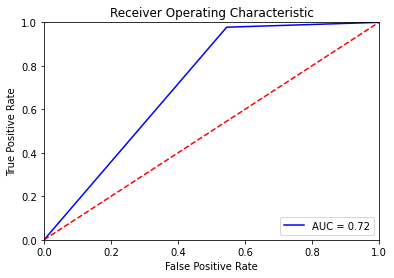

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
